# Credit card approval prediction
In this notebook, we will build an automatic credit card approval predictor using machine learning techniques.
We'll use the <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository and build a machine learning model that can predict if an individual's application for a credit card will be accepted.

#### Data Set Information:

 - All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. 

 - This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.


Attribute Information:

- A1:	b, a. 
- A2:	continuous. 
- A3:	continuous. 
- A4:	u, y, l, t. 
- A5:	g, p, gg. 
- A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff. 
- A7:	v, h, bb, j, n, z, dd, ff, o. 
- A8:	continuous. 
- A9:	t, f. 
- A10:	t, f. 
- A11:	continuous. 
- A12:	t, f. 
- A13:	g, p, s. 
- A14:	continuous. 
- A15:	continuous. 
- A16: +,- (class attribute)
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("credit_card_data.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
data.shape

(690, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [5]:
data.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [6]:
data[15] = data[15].apply(lambda approval: 1 if approval=='+' else 0)

As you can see in the summary statistic above, the features have different scales. This tells us that one must normalise the data before using any algorithm that uses *distances*.

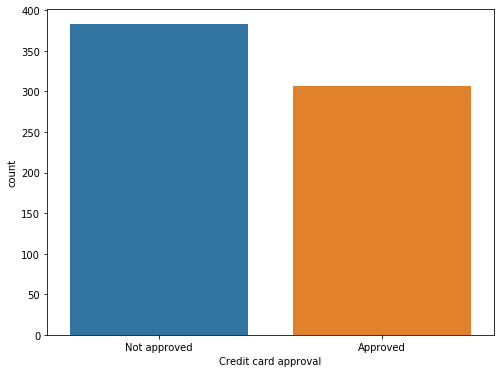

In [7]:
plt.figure(figsize=(8,6))
_ = sns.countplot(data[15])
_ = plt.xlabel('Credit card approval')
_ = plt.xticks([0,1],['Not approved', 'Approved'])


 - There isn't a huge imbalance in the response variable, which is good news! Also note that the majority of credit card applications were not approved. This shows that banks can be choosy while giving out unsecured loans.

Text(0.5, 0, '')

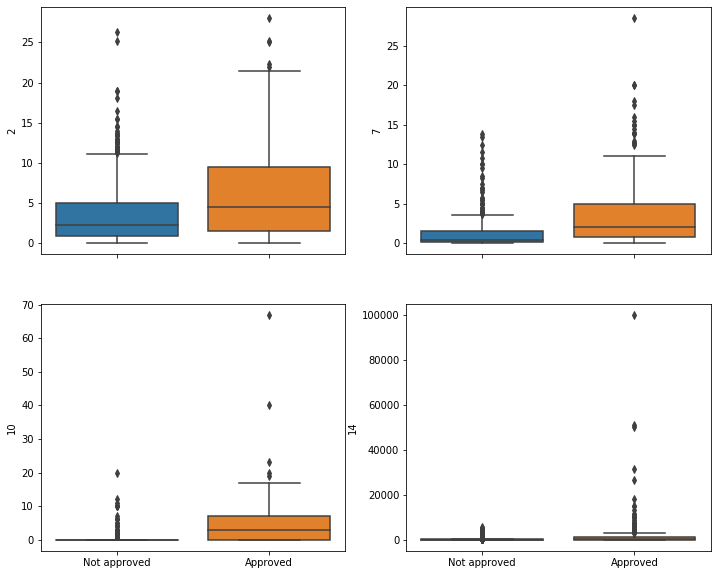

In [8]:
fig,ax = plt.subplots(2,2,sharex=True,figsize=(12,10))
sns.boxplot(x=data[15],y=data[2], ax=ax[0,0])
sns.boxplot(x=data[15],y=data[7],ax=ax[0,1])
sns.boxplot(x=data[15],y=data[10],ax=ax[1,0])
sns.boxplot(x=data[15],y=data[14],ax=ax[1,1])
_=plt.xticks([0,1],['Not approved', 'Approved'])
ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel('')
ax[1,1].set_xlabel('')

### Missing values
 - The missing values in this dataset are encoded as '?'. We first convert these to NaN's since they are easy to manipulate with standard Pandas methods.

In [9]:
#data[data == '?'] = np.nan
data.replace(to_replace='?',value=np.nan, inplace=True)

In [10]:
#How many mising values are there in the dataset?
data.isnull().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

 - Note that there are no missing values in the numeric columns

In [11]:
# cat_cols : columns with categorical data
cat_cols = data.select_dtypes(exclude=[np.number]).columns
for col in cat_cols:
# Impute with the most frequent value or the mode
    data = data.fillna(data[col].value_counts().index[0])

In [12]:
# Is there any more missing value left?
print('Number of missing values in the dataset = ',data.isna().sum().sum())

Number of missing values in the dataset =  0


In [13]:
X = data.drop(15,axis=1)
y = data[15] # target variable

In [14]:
#pd.get_dummies(data=data,drop_first=True)

In [15]:
# Label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype=='object':
        X[col]=le.fit_transform(X[col])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.3,random_state=13)

### Modelling

In [18]:
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [19]:
def generate_report(clf_name, clf, y_pred):
    print("Accuracy of {}: {}".format(clf_name, clf.score(X_test, y_test)))
    print(classification_report(y_test, y_pred))
    print("Tuned Model Parameters: {}".format(clf.best_params_))

#### Logistic regression:

In [28]:
# Setup the pipeline
#steps = [('Imputer', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)), ('scaler', StandardScaler()),
#         ('Logreg', LogisticRegression())]

steps = [('scaler', StandardScaler()),
         ('Logreg', LogisticRegression(solver='lbfgs'))]
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'Logreg__C':[0.01, 0.05, 0.08, 0.1,0.5,1],
              'Logreg__max_iter':[50,100,500]}

logreg = GridSearchCV(pipeline,parameters, cv =5)
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred_logreg = logreg.predict(X_test)

# Compute and print metrics
generate_report('Logreg',logreg,y_pred_logreg)

Accuracy of Logreg: 0.8743961352657005
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       112
           1       0.86      0.86      0.86        95

    accuracy                           0.87       207
   macro avg       0.87      0.87      0.87       207
weighted avg       0.87      0.87      0.87       207

Tuned Model Parameters: {'Logreg__C': 0.05, 'Logreg__max_iter': 50}


/Users/debashis/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Support Vector machine:

In [29]:
steps = [('scaler', StandardScaler()),
         ('SVC', SVC())]
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVC__C':[0.1,0.2, 0.3, 0.5,1, 10]}
svm = GridSearchCV(pipeline,parameters, cv = 5)
svm.fit(X_train,y_train)
y_pred_SVM = svm.predict(X_test)
generate_report('SVM',svm,y_pred_SVM)


Accuracy of SVM: 0.855072463768116
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       112
           1       0.83      0.86      0.85        95

    accuracy                           0.86       207
   macro avg       0.85      0.86      0.85       207
weighted avg       0.86      0.86      0.86       207

Tuned Model Parameters: {'SVC__C': 0.2}


#### K-nearest Neighbours:

In [30]:
steps = [('scaler', StandardScaler()),
         ('KNN', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {'KNN__n_neighbors':range(1,20)}

knn = GridSearchCV(pipeline,parameters, cv = 5)
knn.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred_KNN = knn.predict(X_test)

generate_report('KNN',knn,y_pred_KNN)

Accuracy of KNN: 0.8454106280193237
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       112
           1       0.88      0.77      0.82        95

    accuracy                           0.85       207
   macro avg       0.85      0.84      0.84       207
weighted avg       0.85      0.85      0.84       207

Tuned Model Parameters: {'KNN__n_neighbors': 7}


/Users/debashis/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [36]:
from mlxtend.classifier import StackingCVClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [40]:
sclf = StackingCVClassifier(classifiers=[logreg, svm, knn],
                            meta_classifier=logreg,
                            random_state=42)

print('5-fold cross validation:\n')

for clf, label in zip([logreg, svm, knn, sclf], 
                      ['logistic regression', 
                       'SVM', 
                       'KNN',
                       'StackingClassifier']):

    scores = cross_val_score(clf, X_train, y_train, 
                                              cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.88 (+/- 0.04) [logistic regression]
Accuracy: 0.87 (+/- 0.02) [SVM]
Accuracy: 0.85 (+/- 0.03) [KNN]
Accuracy: 0.87 (+/- 0.03) [StackingClassifier]


In [41]:
sclf.fit(X_train,y_train)
y_pred_stack = sclf.predict(X_test)
print(accuracy_score(y_test,y_pred_stack))

0.8743961352657005
